In [25]:
import pandas as pd 
import csv
import sys
import numpy as np
import decimal 
import scipy.stats as stats
import sklearn.datasets as datasets
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
pd.set_option('display.max_colwidth', -1)

## Reading the tsv files of test and training dataset

In [8]:
test_dataset = pd.read_csv("A3_test_dataset.tsv",sep='\t')
train_dataset = pd.read_csv("A3_training_dataset.tsv",sep='\t')
h = .02
train_dataset.columns



Index(['overlaps_sQTLs', 'overlaps_sQTLs_4_same_gene', 'gene_has_sQTLs', 'AQR',
       'SF3B4', 'PRPF8', 'RBM22', 'BUD13', 'EFTUD2', 'XRN2', 'H3K36me3', 'AAA',
       'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG',
       'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA',
       'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG',
       'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA',
       'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG',
       'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA',
       'TTC', 'TTG', 'TTT', 'group'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


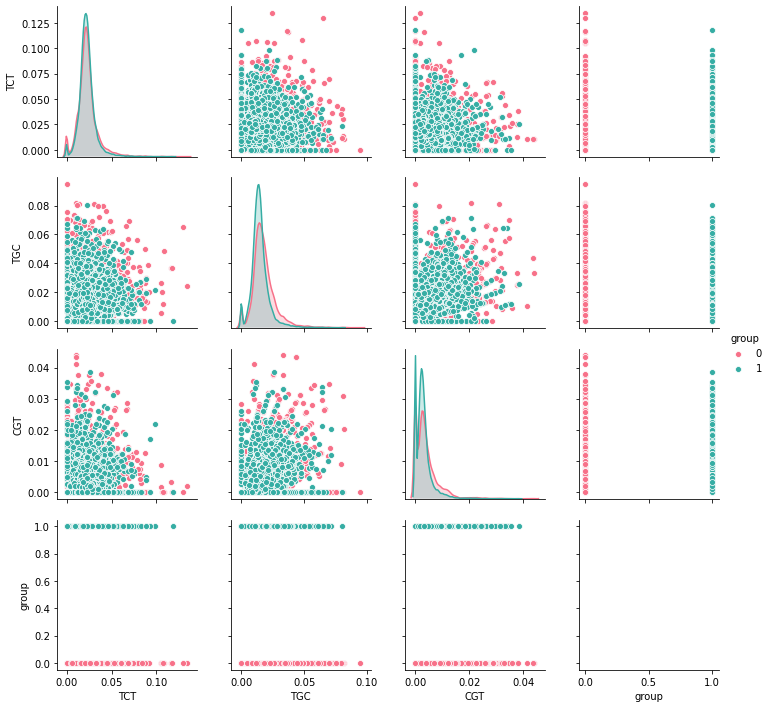

In [14]:
tempwith2features = train_dataset[['TCT', 'TGC','CGT','group']]
s = sns.pairplot(tempwith2features, hue="group",palette="husl")


In [25]:
train_dataset

,overlaps_sQTLs,overlaps_sQTLs_4_same_gene,gene_has_sQTLs,AQR,SF3B4,PRPF8,RBM22,BUD13,EFTUD2,XRN2,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,group
0,0,0,1,0,0,1,1,0,0,0,...,0.012987,0.012987,0.038961,0.012987,0.051948,0.012987,0.051948,0.025974,0.077922,0
1,1,1,1,0,0,0,1,1,0,0,...,0.031237,0.021658,0.014786,0.028322,0.027072,0.018117,0.026239,0.025614,0.059975,1
2,0,0,0,1,0,1,0,1,1,0,...,0.016766,0.029142,0.009581,0.017565,0.015968,0.018762,0.014770,0.025150,0.033134,0
3,0,0,0,0,0,1,0,0,0,0,...,0.023077,0.017231,0.016000,0.022154,0.022462,0.024000,0.018462,0.020000,0.048308,1
4,0,0,0,1,0,1,0,0,0,0,...,0.023786,0.022816,0.014563,0.020874,0.020874,0.026214,0.022330,0.027670,0.055340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21773,0,0,0,0,1,0,0,0,1,0,...,0.028027,0.014574,0.028027,0.031390,0.020179,0.010090,0.025785,0.017937,0.038117,1
21774,0,0,0,0,0,1,0,0,0,0,...,0.009346,0.046729,0.018692,0.009346,0.037383,0.018692,0.009346,0.028037,0.037383,1
21775,0,0,0,0,0,0,0,0,0,0,...,0.023055,0.020775,0.020015,0.021535,0.019762,0.015455,0.021282,0.022802,0.028883,1
21776,0,0,0,0,0,0,0,0,0,0,...,0.018155,0.017187,0.019608,0.027354,0.018640,0.013314,0.013798,0.015493,0.019608,1


Separating the target (group) and features of the dataset in two separate variables 

In [20]:
traindata_targets = train_dataset['group']

In [21]:
traindata_features = train_dataset.loc[:,train_dataset.columns!='group']

In [24]:
linear_svc_classifier = svm.SVC(kernel='linear',probability=True)
linear_svc_classifier.fit(traindata_features,traindata_targets)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Predicting test_dataset using one svm model

In [26]:
results = linear_svc_classifier.predict(test_dataset)
results

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

### Applying cross validation on SVC with different kernels and different choices of C

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = traindata_features
y = traindata_targets

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    #print()3
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.720 (+/-0.008) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.306 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.714 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.720 (+/-0.007) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.712 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.714 (+/-0.020) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.719 (+/-0.002) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.712 (+/-0.013) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.713 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.726 (+/-0.005) for {'C': 10, 'kernel': 'linear'}
0.724 (+/-0.002) for {'C': 100, 'kernel': 'linear'}
0.725 (+/-0.005) for {'C': 1000, 'kernel': 'linear'}


# Tuning hyper-parameters for recall



C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.639 (+/-0.006) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.627 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.639 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.628 (+/-0.008) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.627 (+/-0.008) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.657 (+/-0.006) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.628 (+/-0.009) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.637 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.678 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.681 (+/-0.008) for {'C': 100, 'kernel': 'linear'}
0.683 (+/-0.009) for {'C': 1000, 'kernel': 'linear'}


